In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

pd.set_option('display.max_rows', 500)

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

df = pd.read_csv(url)

In [0]:
#columns to drop bc of NaNs:
drop_cols = ['Alley', 'Fence', 'MiscFeature']
df = df.drop(columns = drop_cols)

In [0]:
#Fill Nans for garage yr blt w/ YearBlt value:

nums = df[df.GarageYrBlt.isna() == True].index
for i in nums:
  df.at[i, 'GarageYrBlt'] = df.at[i, 'YearBuilt']
  
#drop 8 rows of masonry veneer area Nans:
df.dropna(subset=['MasVnrArea'], inplace=True)

#Fill NaNs for LotFrontage as 0:
df['LotFrontage'] = df['LotFrontage'].fillna(0)

In [6]:
numeric_columns = df.select_dtypes(include='number').drop(columns='Id').columns
numeric_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [0]:
def run_linear_model(X, y):
    # Split into test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

    # Fit model using train data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions using test features
    y_pred = model.predict(X_test)

    # Compare predictions to test target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)

    print('Root Mean Squared Error', rmse)
    print('R^2 Score', r2)
    print('Intercept', model.intercept_)
    coefficients = pd.Series(model.coef_, X_train.columns)
    print(coefficients.to_string())

In [8]:
#Pre-feature engineering baseline regression:

target= 'SalePrice'

X = df[numeric_columns].drop(columns=target)
y = df[target]

run_linear_model(X, y)

Root Mean Squared Error 30491.521649630755
R^2 Score 0.8477464959400496
Intercept 220589.42269341327
MSSubClass        -173.645775
LotFrontage          1.754565
LotArea              0.381321
OverallQual      17393.481114
OverallCond       3663.422892
YearBuilt          313.271387
YearRemodAdd       228.352471
MasVnrArea          39.528342
BsmtFinSF1           8.775940
BsmtFinSF2          -2.772518
BsmtUnfSF           -1.446343
TotalBsmtSF          4.557080
1stFlrSF            13.099720
2ndFlrSF            13.393311
LowQualFinSF         7.322930
GrLivArea           33.815960
BsmtFullBath     10711.209239
BsmtHalfBath      2428.199879
FullBath          5700.736127
HalfBath         -3383.169793
BedroomAbvGr     -9849.144139
KitchenAbvGr    -12219.141455
TotRmsAbvGrd      4587.806384
Fireplaces        4654.336873
GarageYrBlt        -29.930401
GarageCars       12190.843114
GarageArea          -4.618454
WoodDeckSF          25.632564
OpenPorchSF        -13.474969
EnclosedPorch        9.782653

#Engineer Some Features

###A log-transformed y variable

In [0]:
df['ln_price'] = np.log(df['SalePrice'])

###Two polynomial features

Find Curved Data:

In [0]:
for feature in df[numeric_columns]:
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

In [0]:
#candidates for curved data after visual inspection, add squared column:
#-OverallQual
#-GarageCars

df['quality_squared'] = df['OverallQual']**2
df['garage_cars_squared'] = df['GarageCars']**2

Check if squaring the Quality feature increased predictive accuracy:

In [16]:
X = df[['OverallQual']]
y = df['SalePrice']

run_linear_model(X, y)

Root Mean Squared Error 45297.668507270086
R^2 Score 0.663983348884778
Intercept -93666.48660666705
OverallQual    45137.190503


In [17]:
X = df[['quality_squared']]
y = df['SalePrice']

run_linear_model(X, y)

Root Mean Squared Error 42824.467576919145
R^2 Score 0.6996739216639173
Intercept 36248.37116356945
quality_squared    3717.658598


Check if squaring the basement square footage increased predictive accuracy:

In [18]:
X = df[['GarageCars']]
y = df['SalePrice']

run_linear_model(X, y)

Root Mean Squared Error 56530.779742080194
R^2 Score 0.4766658778405879
Intercept 63191.699386551816
GarageCars    66547.861117


In [19]:
X = df[['garage_cars_squared']]
y = df['SalePrice']

run_linear_model(X, y)

Root Mean Squared Error 53022.91689699418
R^2 Score 0.5395989222623487
Intercept 107204.01645159317
garage_cars_squared    19976.136255


###One interaction feature

###10 other engineered features


In [0]:
#age:

df['age'] = 2010 - df['YearBuilt']

In [0]:
#renovation_age:

df['renovation_age'] = 2010 - df['YearRemodAdd']

In [0]:
#yard size (ignores deck, pool, etc):

df['yard_size'] = df['LotArea'] - df['1stFlrSF']

In [0]:
#kitchen Quality:

kitchen_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}	
df['KitchenQual'] = df['KitchenQual'].replace(kitchen_map)

In [0]:
#fireplace quality:

fireplace_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.NaN: 0}
df['FireplaceQu'] = df['FireplaceQu'].replace(fireplace_map)

In [0]:
#garage type:

garage_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.NaN: 0}
df['GarageType'] = df['GarageType'].replace(garage_map) 

In [0]:
#garage quality:

df['GarageQual'] = df['GarageQual'].replace(garage_map) 

In [0]:
#garage condition:

df['GarageCond'] = df['GarageCond'].replace(garage_map) 

In [0]:
#garage finish:

finish_map = {'Fin':3, 'RFn': 2, 'Unf':1, np.NaN:0}
df['GarageFinish'] = df['GarageFinish'].replace(finish_map)

In [0]:
#Pool Qulaity:
  
pool_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, np.NaN: 0}
df['PoolQC'] =  df['PoolQC'].replace(pool_map)

In [0]:
#sale type:

sale_map = {'Normal': 3,
            'Partial': 3,
            'Abnorml': 1,
            'Family': 1,
            'AdjLand': 2,	
            'Alloca': 2}

df['sale_type'] = df['SaleCondition'].replace(sale_map)

In [0]:
#Lot shape:

shape_map = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
df["LotShape"] = df["LotShape"].replace(shape_map)

In [0]:
#Street:
  
street_map = {'Grvl':1, 'Pave':2}
df['Street'] = df['Street'].replace(street_map)

In [33]:
numeric_columns = df.select_dtypes(include='number').drop(columns=['Id', 'SalePrice', 'ln_price']).columns
numeric_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'MiscVal', 'MoSold', 'YrSold', 'quality_squared',
       'garage_cars_squared', 'age', 'renovation_age', 'yard_size',
       'sale_type'],
      dtype='object')

In [34]:
target= 'ln_price'

X = df[numeric_columns]
y = df[target]

run_linear_model(X, y)

Root Mean Squared Error 0.13286096811671713
R^2 Score 0.8935465390400429
Intercept 20.257464810352282
MSSubClass            -0.000661
LotFrontage           -0.000229
LotArea                0.000017
Street                 0.053682
LotShape               0.002715
OverallQual            0.076487
OverallCond            0.043711
YearBuilt              0.001409
YearRemodAdd           0.000619
MasVnrArea            -0.000003
BsmtFinSF1             0.000026
BsmtFinSF2             0.000012
BsmtUnfSF             -0.000001
TotalBsmtSF            0.000037
1stFlrSF               0.000032
2ndFlrSF               0.000013
LowQualFinSF           0.000108
GrLivArea              0.000153
BsmtFullBath           0.068229
BsmtHalfBath           0.027902
FullBath               0.043489
HalfBath               0.017464
BedroomAbvGr           0.003495
KitchenAbvGr          -0.036630
TotRmsAbvGrd           0.010563
Fireplaces             0.008024
FireplaceQu            0.013724
GarageYrBlt           -0.000304
Ga

In [0]:
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
import seaborn as sns
%matplotlib inline


In [0]:
X = df[numeric_columns].values
scaled_X = StandardScaler().fit_transform(X)

covar_matrix = PCA(n_components = 30) #we have 30 features

covar_matrix.fit(scaled_X)
                
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

cumulative_var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

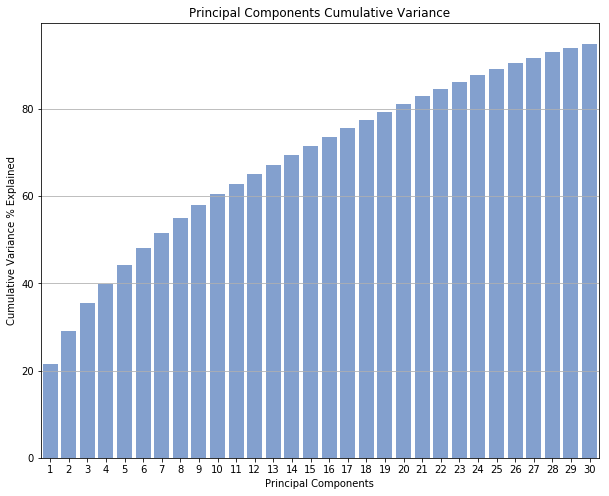

In [39]:
#plot it:

y_vals = [num for num in cumulative_var]
x_vals = [num for num in range(1,31)]

fig, ax = plt.subplots(figsize=(10,8))
ax.grid(True)
ax.set_title('Principal Components Cumulative Variance')
ax.set_ylabel('Cumulative Variance % Explained')
ax.set_xlabel('Principal Components')
sns.barplot(x=x_vals, y=y_vals, ax=ax, color='#769ddb')
plt.show()


In [0]:
pca = PCA(20)

principal_components = pca.fit_transform(scaled_X)

pc_df = pd.DataFrame(data = principal_components)

In [43]:
df[numeric_columns].isna().sum()

MSSubClass             0
LotFrontage            0
LotArea                0
Street                 0
LotShape               0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
MasVnrArea             0
BsmtFinSF1             0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
1stFlrSF               0
2ndFlrSF               0
LowQualFinSF           0
GrLivArea              0
BsmtFullBath           0
BsmtHalfBath           0
FullBath               0
HalfBath               0
BedroomAbvGr           0
KitchenAbvGr           0
TotRmsAbvGrd           0
Fireplaces             0
FireplaceQu            0
GarageYrBlt            0
GarageFinish           0
GarageCars             0
GarageArea             0
GarageQual             0
GarageCond             0
WoodDeckSF             0
OpenPorchSF            0
EnclosedPorch          0
3SsnPorch              0
ScreenPorch            0
PoolArea               0
PoolQC                 0


In [0]:
combined = pc_df.join(df[numeric_columns].reset_index(drop=True))

In [48]:
target= 'ln_price'

X = combined
y = df[target]

run_linear_model(X, y)

Root Mean Squared Error 0.13285651381722052
R^2 Score 0.893553676842148
Intercept -9575639083.312624
0                     -1.320419e+08
1                      7.324378e+06
2                      2.019490e+06
3                     -2.794592e+07
4                      3.179658e+06
5                      3.438620e+06
6                     -2.119812e+05
7                      5.286031e+06
8                      7.426538e+06
9                      2.842934e+06
10                     3.531286e+06
11                    -5.695468e+05
12                    -8.596206e+05
13                    -7.280779e+06
14                     3.411891e+06
15                     1.144646e+07
16                    -5.282038e+06
17                     1.308331e+06
18                     2.375875e+06
19                     5.763359e+06
MSSubClass            -1.504317e+05
LotFrontage            4.101426e+05
LotArea                4.189310e+04
Street                -8.138911e+05
LotShape              -1.375495e+07

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data